In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Machine Learning and statistics imports:

In [2]:
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from scipy import stats

In [1]:
#dataPath = r'local_path

## 2) Load Data

#### Load dataset 1: fixations_selections_menu

In [4]:
#data = pd.read_csv(os.path.join(dataPath,'fixations_selections_menu.csv'))
data = pd.read_csv('fixations_selections_menu.csv')
data

,Trial,FixNr,TimeStampStart,TimeStampEnd,Start,End,Duration,Xloc,Yloc,Phase,Su,ROI,image,Image,Name,Category,selection,selection_cat
0,2,1,172950,173078,-47,81,129,199.0,511.3,Image,p1.asc,3,menu1.csv,1,background,Elsewhere,6_pieces_bargain_bucket,Menu_Item
1,2,2,173176,173310,179,313,135,559.5,502.0,Image,p1.asc,7,menu1.csv,1,image_food,Images,6_pieces_bargain_bucket,Menu_Item
2,2,3,173359,173497,362,500,139,640.3,179.6,Image,p1.asc,8,menu1.csv,1,title_bargain_bucket,Title,6_pieces_bargain_bucket,Menu_Item
3,2,4,173526,173698,529,701,173,569.7,88.4,Image,p1.asc,3,menu1.csv,1,background,Elsewhere,6_pieces_bargain_bucket,Menu_Item
4,2,5,173721,174063,724,1066,343,516.3,106.9,Image,p1.asc,2,menu1.csv,1,title_menu,Title,6_pieces_bargain_bucket,Menu_Item
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61702,11,97,4326566,4326776,20685,20895,211,448.0,553.7,Image,p9.asc,20,menu9.csv,9,mediterranean_veggie,Menu_Item,mediterranean_veggie,Menu_Item
61703,11,98,4326810,4327083,20929,21202,274,360.1,560.1,Image,p9.asc,20,menu9.csv,9,mediterranean_veggie,Menu_Item,mediterranean_veggie,Menu_Item
61704,11,99,4327106,4327259,21225,21378,154,321.0,516.7,Image,p9.asc,18,menu9.csv,9,tortilla_spring_rolls,Menu_Item,mediterranean_veggie,Menu_Item
61705,11,100,4327296,4327620,21415,21739,325,418.3,511.0,Image,p9.asc,38,menu9.csv,9,background,Elsewhere,mediterranean_veggie,Menu_Item


#### Load dataset 2: menu_items

In [5]:
#info_menus = pd.read_excel(os.path.join(dataPath,'menu_items.xlsx'))
info_menus = pd.read_excel('menu_items.xlsx')
info_menus

,index,menu,items,Price,Price_known,Position,Calories,Calories_known
0,1,menu1,6_pieces_family_feast,11.99,1,6,-1,0
1,2,menu1,8_filets_4_dips_deluxe,13.99,1,10,-1,0
2,3,menu1,14_pieces_bargain_bucket,15.99,1,3,-1,0
3,4,menu1,10_pieces_bargain_bucket,12.99,1,2,-1,0
4,5,menu1,10_pieces_wicked_variety_bucket,16.99,1,5,-1,0
...,...,...,...,...,...,...,...,...
340,9,menu30,baked_beans,3.50,1,4,-1,0
341,10,menu30,breakfast_butties,3.95,1,3,-1,0
342,11,menu30,light_cooked_breakfast,5.50,1,2,-1,0
343,12,menu30,pork_sausages,5.50,1,1,-1,0


#### Load dataset 3: Questionnaire
There are 25 participants. Four of them are vegetarian. There is much variability in how much they eat fastfood

In [6]:
#questionnaire = pd.read_csv(os.path.join(dataPath,'questionnaire_menu.csv'))
questionnaire = pd.read_csv('questionnaire_menu.csv')
questionnaire

,person,age,gender,dietary_requirements,restaurants_frequency,fastfood_frequency,salt_content,calories,satured_fat,price,taste,quantity,checks_ingredients,currently_hungry,trying_to_lose_weigth
0,1,20,Female,No requirements,3 to 4 times per month,2 to 3 times per week,1,3,2,6,5,4,calories,no,no
1,2,19,Female,No requirements,Not,1 time per week,2,4,1,5,6,3,"price, fat, sugar",yes,yes
2,3,20,Male,No requirements,Not,1 time per week,1,2,3,5,4,6,fat,yes,no
3,4,20,Male,No requirements,2 to 3 times per month,Not,2,4,5,3,6,1,fat,no,no
4,5,19,Female,No requirements,1 time per month,Not,4,6,5,2,1,3,salt,no,no
5,6,20,Female,No requirements,Not,2 times per week,1,6,6,1,6,1,"calories, fat",no,yes
6,7,19,Female,No requirements,Not,3 times per week,1,3,2,5,4,6,none,no,no
7,8,20,Female,Vegetarian and healthy,1 time per week,Not,3,1,4,5,6,6,sugar,yes,yes
8,9,18,Female,No requirements,1 time per month,1 time per month,2,1,1,3,6,4,none,yes,no
9,10,19,Female,No requirements,1 time per week,1 time per week,1,3,2,6,5,4,"fat, calories, salt",no,no


## 3) Data exploration (dataset 1)
First I look at the trials because I don't understand yet what they mean. There are 30 trials in total with approximately 1800-2500 instances each:

In [7]:
data.value_counts('Trial').sort_index()

Trial
1     2265
2     2380
3     2073
4     2253
5     2218
6     2131
7     1924
8     2164
9     1968
10    1788
11    2115
12    2037
13    1974
14    2170
15    1765
16    2000
17    1876
18    2253
19    2481
20    1884
21    2123
22    2022
23    2038
24    1791
25    2236
26    2076
27    2000
28    1845
29    2083
30    1774
dtype: int64

There are 25 participants, which corresponds to the questionnaire dataset:

In [8]:
pd.unique(data['Su'])

array(['p1.asc', 'p10.asc', 'p11.asc', 'p12.asc', 'p13.asc', 'p14.asc',
       'p15.asc', 'p16.asc', 'p17.asc', 'p18.asc', 'p19.asc', 'p2.asc',
       'p20.asc', 'p21.asc', 'p22.asc', 'p23.asc', 'p24.asc', 'p25.asc',
       'p3.asc', 'p4.asc', 'p5.asc', 'p6.asc', 'p7.asc', 'p8.asc',
       'p9.asc'], dtype=object)

Each trial countains roughly all participants. This means most likely that all particitants looked at all menus:

In [9]:
data.groupby(['Trial','Su']).size()

Trial  Su     
1      p1.asc      99
       p10.asc     53
       p11.asc    156
       p12.asc     47
       p13.asc    100
                 ... 
30     p5.asc     100
       p6.asc      51
       p7.asc      44
       p8.asc      54
       p9.asc     110
Length: 728, dtype: int64

In [10]:
#Example: Trial 1
data[data['Trial']==1].groupby(['Su']).size().sort_index().index

Index(['p1.asc', 'p10.asc', 'p11.asc', 'p12.asc', 'p13.asc', 'p14.asc',
       'p15.asc', 'p17.asc', 'p18.asc', 'p19.asc', 'p2.asc', 'p20.asc',
       'p21.asc', 'p22.asc', 'p23.asc', 'p25.asc', 'p3.asc', 'p4.asc',
       'p5.asc', 'p6.asc', 'p7.asc', 'p8.asc', 'p9.asc'],
      dtype='object', name='Su')

There are indeed 30 menus, which correspondents to the number of trials:

In [11]:
data.groupby(['image']).size()

image
menu1.csv     1953
menu10.csv    1433
menu11.csv    2789
menu12.csv    1566
menu13.csv    2203
menu14.csv    2515
menu15.csv    2013
menu16.csv    2423
menu17.csv    2286
menu18.csv    1930
menu19.csv    1616
menu2.csv     2543
menu20.csv    2360
menu21.csv    1830
menu22.csv    2191
menu23.csv    1364
menu24.csv    2173
menu25.csv    1918
menu26.csv    2032
menu27.csv    1748
menu28.csv    2236
menu29.csv    2432
menu3.csv     2123
menu30.csv    1065
menu4.csv     1587
menu5.csv     2563
menu6.csv     2538
menu7.csv     1867
menu8.csv     1957
menu9.csv     2453
dtype: int64

When I sort using 'TimeStampStart' for participant 1, the dataframe starts with trial 1 and menu 18. Thus, the trails corresponds to time (chronological order). Also, this means that the order in which the participants saw the menus varied:

In [12]:
data[data['Su']=='p1.asc'].sort_values('TimeStampStart')

,Trial,FixNr,TimeStampStart,TimeStampEnd,Start,End,Duration,Xloc,Yloc,Phase,Su,ROI,image,Image,Name,Category,selection,selection_cat
19181,1,1,146663,146822,-41,118,160,632.3,877.4,Image,p1.asc,0,menu18.csv,18,outside_menu,Elsewhere,cheesy_cheddar_steak_frank,Menu_Item
19182,1,2,146873,146995,169,291,123,588.4,435.7,Image,p1.asc,10,menu18.csv,18,image_food,Images,cheesy_cheddar_steak_frank,Menu_Item
19183,1,3,147042,147373,338,669,332,585.6,115.2,Image,p1.asc,1,menu18.csv,18,title_signature,Title,cheesy_cheddar_steak_frank,Menu_Item
19184,1,4,147502,147681,798,977,180,612.3,313.0,Image,p1.asc,0,menu18.csv,18,outside_menu,Elsewhere,cheesy_cheddar_steak_frank,Menu_Item
19185,1,5,147737,147980,1033,1276,244,658.1,637.0,Image,p1.asc,11,menu18.csv,18,chili_cheese_steak_frank,Menu_Item,cheesy_cheddar_steak_frank,Menu_Item
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43268,29,147,943084,943277,35561,35754,194,317.6,547.2,Image,p1.asc,61,menu29.csv,29,background,Elsewhere,freshly_baked_dough_balls,Menu_Item
43269,29,148,943299,943442,35776,35919,144,342.0,539.2,Image,p1.asc,61,menu29.csv,29,background,Elsewhere,freshly_baked_dough_balls,Menu_Item
43270,29,149,943481,943673,35958,36150,193,256.8,576.4,Image,p1.asc,14,menu29.csv,29,freshly_baked_dough_balls,Menu_Item,freshly_baked_dough_balls,Menu_Item
43271,29,150,943694,943980,36171,36457,287,245.1,578.8,Image,p1.asc,61,menu29.csv,29,background,Elsewhere,freshly_baked_dough_balls,Menu_Item


The majority clicked on a 'Menu_Item'. It might be needed to remove the cases where they clicked on something else:

In [13]:
data.value_counts('selection_cat')

selection_cat
Menu_Item       49177
Price            3356
Elsewhere        1907
Images           1664
Elsewhere        1661
Info              954
Title             649
Add               233
High_Calorie      204
Logos             104
Menu_Item          80
dtype: int64

## 4) Predict choice based on menus only

#### 4a) Data processing
<u>Step 1: Aggregate basis-data to 1 instance per 'case' (trial-person combi)</u>

First, the 'Su' column is converted to 'person', so that it can later be linked to the questionnaire

In [14]:
data['person'] = data['Su'].apply(lambda x: x.split('.')[0][1:])

Next, a new dataframe is created with one instance per case. In addition to trial, su and person, targets 'selection' and 'selection_cat' are added 

In [15]:
data0 = data.groupby(['Trial','person']).agg(lambda x: x.iloc[0]).reset_index()[['Trial','Su','person','image','selection','selection_cat']]
data0

,Trial,Su,person,image,selection,selection_cat
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item
4,1,p13.asc,13,menu24.csv,info_vega,Info
...,...,...,...,...,...,...
723,30,p5.asc,5,menu12.csv,image_food,Images
724,30,p6.asc,6,menu17.csv,NaN,NaN
725,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item
726,30,p8.asc,8,menu22.csv,mozzerella_pesto_buger,Menu_Item


* Menu 4 is removed because it's too complicated
* Some typo's are corrected

In [16]:
data0 = data0[data0['image'] != 'menu4.csv'].reset_index(drop=True)
data0['selection'][128] = 'wild_alaska_salmon'
data0['selection'][293] = 'honey_mustard_grilled_chicken_sandwich'
data0['selection'][419] = 'honey_mustard_grilled_chicken_sandwich'
data0['selection'][368] = 'pasta_marco_polo'
data0['selection'][420] = 'pasta_marco_polo'
data0['selection'][522] = 'pasta_marco_polo'
data0['selection'][701] = 'mozzerella_pesto_burger'
data0['selection'] = data0['selection'].apply(lambda x: 'the_caniac_combo' if x=='6_chicken_fingers' else x)
data0['selection'] = data0['selection'].apply(lambda x: 'the_box_combo' if x=='4_chicken_fingers' else x)

C:\Users\gdawe2\AppData\Local\Temp\ipykernel_18420\2330223427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['selection'][128] = 'wild_alaska_salmon'
C:\Users\gdawe2\AppData\Local\Temp\ipykernel_18420\2330223427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data0['selection'][293] = 'honey_mustard_grilled_chicken_sandwich'
C:\Users\gdawe2\AppData\Local\Temp\ipykernel_18420\2330223427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

<u>Step 2: Convert targets</u>

On one hand, I want to combine all menus for training/testing, to have a larger dataset and a more general prediction. On the other, the number of features would be too large when all ~600 dishes from all menus are added as feature.

Therefore, I decide to convert the target into numbers. For instance, menu 1 has 11 dishes, meaning that the targets are converted to 1-11. These numbers are strings, so the target is categorical and not numerical. 

The difficulty here is that '1' in menu A does not correspond to '1' in menu B. I assume that the ML-methods can deal with this, with help of the features in the dataset. 

The values are already in the 'menu_items' dataset as 'index' and are added to the new dataframe:

In [17]:
def convert_target():
    target0 = []
    for ii in range(0,len(data0)):
        if data0['selection_cat'][ii] == 'Menu_Item':
            menu = data0['image'][ii][:-4]
            target = data0['selection'][ii]
            info_menus_temp = info_menus[info_menus['menu']==menu]
            indx = info_menus_temp.index[info_menus_temp['items']==target][0]
            indx2 = info_menus_temp['index'][indx]
            target0.append(str(indx2))
        else:
            target0.append(np.nan)
    data0['target'] = target0
    return data0

data0 = convert_target()
data0    

,Trial,Su,person,image,selection,selection_cat,target
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item,3
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item,5
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item,11
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item,8
4,1,p13.asc,13,menu24.csv,info_vega,Info,NaN
...,...,...,...,...,...,...,...
698,30,p5.asc,5,menu12.csv,image_food,Images,NaN
699,30,p6.asc,6,menu17.csv,NaN,NaN,NaN
700,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item,13
701,30,p8.asc,8,menu22.csv,mozzerella_pesto_burger,Menu_Item,8


<u>Step 3: Remove instances that have wrong selection_cat</u>

It is hard to deal with selection that are no menu_item, such as 'Background'. Therefore I decide for now to remove all instances that have no 'Menu_Item' as selection_cat

In [18]:
data0 = data0[data0['selection_cat']=='Menu_Item'].reset_index(drop=True)
data0

,Trial,Su,person,image,selection,selection_cat,target
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item,3
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item,5
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item,11
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item,8
4,1,p14.asc,14,menu1.csv,6_pieces_bargain_bucket,Menu_Item,11
...,...,...,...,...,...,...,...
533,30,p25.asc,25,menu21.csv,mac_cheese,Menu_Item,15
534,30,p3.asc,3,menu16.csv,bacon_egg_burger,Menu_Item,3
535,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item,13
536,30,p8.asc,8,menu22.csv,mozzerella_pesto_burger,Menu_Item,8


<u>Step 4: Add features about price, position and calories (thus, menu characteristics) </u>

First the price is added. I want to have a general model that works in general and not only for specific menus. Therefore, instead of absolute prices, I divide them into categories: Most expensive, Second most expensive, middle, second cheapest and cheapest. In addition, for menus that don't mention a price, I use 'unknown'

In the function below, these categories are first added to the info_menus dataset

In [19]:
def get_price_cat():
    price_cat = []
    for m in range(1,31):
        if not m == 4:
            menu = 'menu'+str(m)
            data_temp = info_menus[info_menus['menu']==menu]
            prices = sorted(list(set(data_temp['Price'])),reverse=True)
            price_known = data_temp.iloc[0]['Price_known']
            if price_known:
                for index,row in data_temp.iterrows():
                    price = row['Price']
                    if len(prices) > 0:
                        if price == prices[0]:
                            price_cat.append('Most expensive')
                        elif len(prices) > 1:
                            if price == prices[1]:
                                price_cat.append('Second most expensive')
                            elif len(prices) > 1:
                                if price == prices[-2]:
                                    price_cat.append('Second cheapest')
                                elif len(prices) > 1:
                                    if price == prices[-1]:
                                        price_cat.append('Cheapest')
                                    else:
                                        price_cat.append('Middle')
            else:
                    no_price = ['Unknown'] * len(data_temp)
                    price_cat += no_price 
    info_menus['Price_cat'] = price_cat
    return info_menus
    
info_menus = get_price_cat()
info_menus

,index,menu,items,Price,Price_known,Position,Calories,Calories_known,Price_cat
0,1,menu1,6_pieces_family_feast,11.99,1,6,-1,0,Second cheapest
1,2,menu1,8_filets_4_dips_deluxe,13.99,1,10,-1,0,Middle
2,3,menu1,14_pieces_bargain_bucket,15.99,1,3,-1,0,Second most expensive
3,4,menu1,10_pieces_bargain_bucket,12.99,1,2,-1,0,Middle
4,5,menu1,10_pieces_wicked_variety_bucket,16.99,1,5,-1,0,Most expensive
...,...,...,...,...,...,...,...,...,...
340,9,menu30,baked_beans,3.50,1,4,-1,0,Middle
341,10,menu30,breakfast_butties,3.95,1,3,-1,0,Middle
342,11,menu30,light_cooked_breakfast,5.50,1,2,-1,0,Second most expensive
343,12,menu30,pork_sausages,5.50,1,1,-1,0,Second most expensive


Next, they are added to the new 'data0' dataset, which is going to be used for training/testing. 

Here, the number of extra columns is 26, since the max number of dishes is 26 (menu 6). For dishes that don't exist on a particular menu, I fill in 'No_meal'. Hopefully the ML-models will learn that dishes that are not on the menu should not be chosen. 

In [20]:
def get_price_cat_choice():
    max_dishes = 26
    dishes = [[] for i in range(max_dishes)]   
    
    for p in range(0,len(data0)):
        menu = data0.iloc[p]['image'][:-4]
        data_temp = info_menus[info_menus['menu']==menu]
        numberOfDishes = max(data_temp['index'])
        for d in range(0,len(dishes)):
            if numberOfDishes > d:
                dishes[d].append(data_temp.iloc[d]['Price_cat'])
            else:
                dishes[d].append('No_meal')  

    for d in range(0,len(dishes)):
        if d<9:
            numb = '0'+str(d+1)
        else:
            numb = str(d+1)    
        data0['Price_cat_dish'+numb] = dishes[d]
    return data0

data0 = get_price_cat_choice()
data0

,Trial,Su,person,image,selection,selection_cat,target,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,...,Price_cat_dish17,Price_cat_dish18,Price_cat_dish19,Price_cat_dish20,Price_cat_dish21,Price_cat_dish22,Price_cat_dish23,Price_cat_dish24,Price_cat_dish25,Price_cat_dish26
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item,3,Most expensive,Second most expensive,Most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item,5,Unknown,Unknown,Unknown,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item,11,Middle,Most expensive,Middle,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item,8,Second most expensive,Middle,Most expensive,...,Second most expensive,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
4,1,p14.asc,14,menu1.csv,6_pieces_bargain_bucket,Menu_Item,11,Second cheapest,Middle,Second most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,30,p25.asc,25,menu21.csv,mac_cheese,Menu_Item,15,Second cheapest,Middle,Middle,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
534,30,p3.asc,3,menu16.csv,bacon_egg_burger,Menu_Item,3,Second most expensive,Second most expensive,Cheapest,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
535,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item,13,Second most expensive,Second most expensive,Second cheapest,...,Middle,Middle,Middle,Second cheapest,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
536,30,p8.asc,8,menu22.csv,mozzerella_pesto_burger,Menu_Item,8,Second most expensive,Middle,Most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal


I do exactly the same for the calories. Since only a few menus indicatie calories (or weight), I make just two categories: 'Most calories' and 'Not most calories'

In [21]:
def get_calories_cat():
    calories_cat = []
    for m in range(1,31):
        if not m == 4:
            menu = 'menu'+str(m)
            data_temp = info_menus[info_menus['menu']==menu]
            calories = sorted(list(set(data_temp['Calories'])),reverse=True)
            calories_known = data_temp.iloc[0]['Calories_known']
            if calories_known:
                for index,row in data_temp.iterrows():
                    calorie = row['Calories']
                    if len(calories) > 0:
                        if calorie == calories[0]:
                            calories_cat.append('Most Calories')
                        elif len(calories) > 1:
                            calories_cat.append('Not most calories')
            else:
                no_calories = ['Unknown'] * len(data_temp)
                calories_cat += no_calories
    info_menus['Calories_cat'] = calories_cat
    return info_menus
                
info_menus = get_calories_cat()
info_menus

,index,menu,items,Price,Price_known,Position,Calories,Calories_known,Price_cat,Calories_cat
0,1,menu1,6_pieces_family_feast,11.99,1,6,-1,0,Second cheapest,Unknown
1,2,menu1,8_filets_4_dips_deluxe,13.99,1,10,-1,0,Middle,Unknown
2,3,menu1,14_pieces_bargain_bucket,15.99,1,3,-1,0,Second most expensive,Unknown
3,4,menu1,10_pieces_bargain_bucket,12.99,1,2,-1,0,Middle,Unknown
4,5,menu1,10_pieces_wicked_variety_bucket,16.99,1,5,-1,0,Most expensive,Unknown
...,...,...,...,...,...,...,...,...,...,...
340,9,menu30,baked_beans,3.50,1,4,-1,0,Middle,Unknown
341,10,menu30,breakfast_butties,3.95,1,3,-1,0,Middle,Unknown
342,11,menu30,light_cooked_breakfast,5.50,1,2,-1,0,Second most expensive,Unknown
343,12,menu30,pork_sausages,5.50,1,1,-1,0,Second most expensive,Unknown


In [22]:
def get_calories_cat_choice():
    max_dishes = 26
    dishes = [[] for i in range(max_dishes)]   
    
    for p in range(0,len(data0)):
        menu = data0.iloc[p]['image'][:-4]
        data_temp = info_menus[info_menus['menu']==menu]
        numberOfDishes = max(data_temp['index'])
        for d in range(0,len(dishes)):
            if numberOfDishes > d:
                dishes[d].append(data_temp.iloc[d]['Calories_cat'])
            else:
                dishes[d].append('No_meal')  

    for d in range(0,len(dishes)):
        if d<9:
            numb = '0'+str(d+1)
        else:
            numb = str(d+1)    
        data0['Calories_cat_dish'+numb] = dishes[d]
    return data0

data0 = get_calories_cat_choice()
data0

,Trial,Su,person,image,selection,selection_cat,target,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,...,Calories_cat_dish17,Calories_cat_dish18,Calories_cat_dish19,Calories_cat_dish20,Calories_cat_dish21,Calories_cat_dish22,Calories_cat_dish23,Calories_cat_dish24,Calories_cat_dish25,Calories_cat_dish26
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item,3,Most expensive,Second most expensive,Most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item,5,Unknown,Unknown,Unknown,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item,11,Middle,Most expensive,Middle,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item,8,Second most expensive,Middle,Most expensive,...,Unknown,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
4,1,p14.asc,14,menu1.csv,6_pieces_bargain_bucket,Menu_Item,11,Second cheapest,Middle,Second most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,30,p25.asc,25,menu21.csv,mac_cheese,Menu_Item,15,Second cheapest,Middle,Middle,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
534,30,p3.asc,3,menu16.csv,bacon_egg_burger,Menu_Item,3,Second most expensive,Second most expensive,Cheapest,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
535,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item,13,Second most expensive,Second most expensive,Second cheapest,...,Unknown,Unknown,Unknown,Unknown,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal
536,30,p8.asc,8,menu22.csv,mozzerella_pesto_burger,Menu_Item,8,Second most expensive,Middle,Most expensive,...,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal,No_meal


In contradiction to price and calories, position is kind of independent from the particular menu. Thus, I use this variable as numerical instead of categorical. When the meal does not exist, I add 14 (because the lowest position on any menu is 13). 

In [23]:
def get_position_choice():
    max_dishes = 26
    dishes = [[] for i in range(max_dishes)]   
    
    for p in range(0,len(data0)):
        menu = data0.iloc[p]['image'][:-4]
        data_temp = info_menus[info_menus['menu']==menu]
        numberOfDishes = max(data_temp['index'])
        for d in range(0,len(dishes)):
            if numberOfDishes > d:
                dishes[d].append(data_temp.iloc[d]['Position'])
            else:
                dishes[d].append(14)  

    for d in range(0,len(dishes)):
        if d<9:
            numb = '0'+str(d+1)
        else:
            numb = str(d+1)    
        data0['Position_dish'+numb] = dishes[d]
    return data0

data0 = get_position_choice()
data0

,Trial,Su,person,image,selection,selection_cat,target,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,...,Position_dish17,Position_dish18,Position_dish19,Position_dish20,Position_dish21,Position_dish22,Position_dish23,Position_dish24,Position_dish25,Position_dish26
0,1,p1.asc,1,menu18.csv,cheesy_cheddar_steak_frank,Menu_Item,3,Most expensive,Second most expensive,Most expensive,...,14,14,14,14,14,14,14,14,14,14
1,1,p10.asc,10,menu23.csv,grilled_haloumi,Menu_Item,5,Unknown,Unknown,Unknown,...,14,14,14,14,14,14,14,14,14,14
2,1,p11.asc,11,menu30.csv,light_cooked_breakfast,Menu_Item,11,Middle,Most expensive,Middle,...,14,14,14,14,14,14,14,14,14,14
3,1,p12.asc,12,menu15.csv,katsu_curry_chicken,Menu_Item,8,Second most expensive,Middle,Most expensive,...,4,14,14,14,14,14,14,14,14,14
4,1,p14.asc,14,menu1.csv,6_pieces_bargain_bucket,Menu_Item,11,Second cheapest,Middle,Second most expensive,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,30,p25.asc,25,menu21.csv,mac_cheese,Menu_Item,15,Second cheapest,Middle,Middle,...,14,14,14,14,14,14,14,14,14,14
534,30,p3.asc,3,menu16.csv,bacon_egg_burger,Menu_Item,3,Second most expensive,Second most expensive,Cheapest,...,14,14,14,14,14,14,14,14,14,14
535,30,p7.asc,7,menu29.csv,chicken_burger,Menu_Item,13,Second most expensive,Second most expensive,Second cheapest,...,5,6,7,6,14,14,14,14,14,14
536,30,p8.asc,8,menu22.csv,mozzerella_pesto_burger,Menu_Item,8,Second most expensive,Middle,Most expensive,...,14,14,14,14,14,14,14,14,14,14


In summary, these are the columns in data0:

In [24]:
data0.columns

Index(['Trial', 'Su', 'person', 'image', 'selection', 'selection_cat',
       'target', 'Price_cat_dish01', 'Price_cat_dish02', 'Price_cat_dish03',
       'Price_cat_dish04', 'Price_cat_dish05', 'Price_cat_dish06',
       'Price_cat_dish07', 'Price_cat_dish08', 'Price_cat_dish09',
       'Price_cat_dish10', 'Price_cat_dish11', 'Price_cat_dish12',
       'Price_cat_dish13', 'Price_cat_dish14', 'Price_cat_dish15',
       'Price_cat_dish16', 'Price_cat_dish17', 'Price_cat_dish18',
       'Price_cat_dish19', 'Price_cat_dish20', 'Price_cat_dish21',
       'Price_cat_dish22', 'Price_cat_dish23', 'Price_cat_dish24',
       'Price_cat_dish25', 'Price_cat_dish26', 'Calories_cat_dish01',
       'Calories_cat_dish02', 'Calories_cat_dish03', 'Calories_cat_dish04',
       'Calories_cat_dish05', 'Calories_cat_dish06', 'Calories_cat_dish07',
       'Calories_cat_dish08', 'Calories_cat_dish09', 'Calories_cat_dish10',
       'Calories_cat_dish11', 'Calories_cat_dish12', 'Calories_cat_dish13',
       'C

<u>Step 5: First inventarisation</u>

Before we start model training/testing, I do a first inventarisation on the choices made. This is only for first insights, and not used for later steps

First, I check the price. It seems that more people choose 'second most expensive' than for the most expensive meal. The difference between cheapest and second cheapest is smaller. Middle is the largest, which makes sense because most meals are in that category

In [25]:
def summary_choice_price():
    data00 = data0.copy()
    choice = []
    for c in range(0,len(data0)):
        if len(data0['target'][c]) == 1:
            numb = '0'+ data0['target'][c]
        else:
            numb = data0['target'][c]
        col = 'Price_cat_dish'+numb
        choice.append(data00[col][c])
    data00['Price_choice'] = choice
    return data00

data00 = summary_choice_price()
data00.value_counts('Price_choice')        

Price_choice
Unknown                  169
Middle                   141
Second most expensive     83
Cheapest                  52
Most expensive            49
Second cheapest           44
dtype: int64

By far most people don't choose for the meal with most calories/weight:

In [26]:
def summary_choice_calories():
    data00 = data0.copy()
    choice = []
    for c in range(0,len(data0)):
        if len(data0['target'][c]) == 1:
            numb = '0'+ data0['target'][c]
        else:
            numb = data0['target'][c]
        col = 'Calories_cat_dish'+numb
        choice.append(data00[col][c])
    data00['Calories_choice'] = choice
    return data00

data00 = summary_choice_calories()
data00.value_counts('Calories_choice')    

Calories_choice
Unknown              480
Not most calories     54
Most Calories          4
dtype: int64

It seems that there is some trend that people tend to choose for meals on top of the menu

In [27]:
def summary_choice_position():
    data00 = data0.copy()
    choice = []
    for c in range(0,len(data0)):
        if len(data0['target'][c]) == 1:
            numb = '0'+ data0['target'][c]
        else:
            numb = data0['target'][c]
        col = 'Position_dish'+numb
        choice.append(data00[col][c])
    data00['Position_choice'] = choice
    return data00

data00 = summary_choice_position()
data00.value_counts('Position_choice')    

Position_choice
1     121
2      91
6      72
3      64
4      53
5      49
8      31
7      21
9      14
13      7
10      6
11      6
12      3
dtype: int64

#### 4b) Train ML-models (menu-info only)
Make X and y

Since the target is categorical with 26 labels, y must consist of 26 binary columns. Per instance, one of them is 1, the others are 0

In addition, they are sorted in the right order

In [28]:
y = pd.get_dummies(data0[['target']])
for c in range(0,len(y.columns)):
    if len(y.columns[c].split('_')[1]) == 1:
        colname0 = y.columns[c]
        colname = colname0[:-1]+'0'+colname0[-1]
        y = y.rename({colname0 : colname},axis='columns')
y = y.reindex(sorted(y.columns),axis='columns')
y

,target_01,target_02,target_03,target_04,target_05,target_06,target_07,target_08,target_09,target_10,...,target_16,target_17,target_18,target_19,target_20,target_21,target_22,target_23,target_24,target_25
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
534,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


for X, also the price and calorie features are encoded to dummy-features. For price, it can be considered (instead of creating dummies) to transform the classes to numbers, because there is order in it (cheapest, second cheapest, ...). However, this is problematic for the 'Unknown' and 'No meal' categories. Thus, I chose for dummies (same for calories). 

This is not done for the position features, since these are numerical

In [29]:
def get_X_menu():
    price_features = ['Price_cat_dish01','Price_cat_dish02','Price_cat_dish03',
           'Price_cat_dish04', 'Price_cat_dish05', 'Price_cat_dish06',
           'Price_cat_dish07', 'Price_cat_dish08', 'Price_cat_dish09',
           'Price_cat_dish10', 'Price_cat_dish11', 'Price_cat_dish12',
           'Price_cat_dish13', 'Price_cat_dish14', 'Price_cat_dish15',
           'Price_cat_dish16', 'Price_cat_dish17', 'Price_cat_dish18',
           'Price_cat_dish19', 'Price_cat_dish20', 'Price_cat_dish21',
           'Price_cat_dish22', 'Price_cat_dish23', 'Price_cat_dish24',
           'Price_cat_dish25', 'Price_cat_dish26']
    X_temp1 = pd.get_dummies(data0[price_features])
    calorie_features = ['Calories_cat_dish01',
           'Calories_cat_dish02', 'Calories_cat_dish03', 'Calories_cat_dish04',
           'Calories_cat_dish05', 'Calories_cat_dish06', 'Calories_cat_dish07',
           'Calories_cat_dish08', 'Calories_cat_dish09', 'Calories_cat_dish10',
           'Calories_cat_dish11', 'Calories_cat_dish12', 'Calories_cat_dish13',
           'Calories_cat_dish14', 'Calories_cat_dish15', 'Calories_cat_dish16',
           'Calories_cat_dish17', 'Calories_cat_dish18', 'Calories_cat_dish19',
           'Calories_cat_dish20', 'Calories_cat_dish21', 'Calories_cat_dish22',
           'Calories_cat_dish23', 'Calories_cat_dish24', 'Calories_cat_dish25',
           'Calories_cat_dish26']
    X_temp2 = pd.get_dummies(data0[calorie_features])
    position_features = ['Position_dish01', 'Position_dish02',
           'Position_dish03', 'Position_dish04', 'Position_dish05',
           'Position_dish06', 'Position_dish07', 'Position_dish08',
           'Position_dish09', 'Position_dish10', 'Position_dish11',
           'Position_dish12', 'Position_dish13', 'Position_dish14',
           'Position_dish15', 'Position_dish16', 'Position_dish17',
           'Position_dish18', 'Position_dish19', 'Position_dish20',
           'Position_dish21', 'Position_dish22', 'Position_dish23',
           'Position_dish24', 'Position_dish25', 'Position_dish26']
    X_temp3 = data0[position_features]
    X = pd.concat([X_temp1,X_temp2,X_temp3],axis='columns')
    return X

X = get_X_menu()
X

,Price_cat_dish01_Cheapest,Price_cat_dish01_Middle,Price_cat_dish01_Most expensive,Price_cat_dish01_Second cheapest,Price_cat_dish01_Second most expensive,Price_cat_dish01_Unknown,Price_cat_dish02_Middle,Price_cat_dish02_Most expensive,Price_cat_dish02_Second most expensive,Price_cat_dish02_Unknown,...,Position_dish17,Position_dish18,Position_dish19,Position_dish20,Position_dish21,Position_dish22,Position_dish23,Position_dish24,Position_dish25,Position_dish26
0,0,0,1,0,0,0,0,0,1,0,...,14,14,14,14,14,14,14,14,14,14
1,0,0,0,0,0,1,0,0,0,1,...,14,14,14,14,14,14,14,14,14,14
2,0,1,0,0,0,0,0,1,0,0,...,14,14,14,14,14,14,14,14,14,14
3,0,0,0,0,1,0,1,0,0,0,...,4,14,14,14,14,14,14,14,14,14
4,0,0,0,1,0,0,1,0,0,0,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0,0,0,1,0,0,1,0,0,0,...,14,14,14,14,14,14,14,14,14,14
534,0,0,0,0,1,0,0,0,1,0,...,14,14,14,14,14,14,14,14,14,14
535,0,0,0,0,1,0,0,0,1,0,...,5,6,7,6,14,14,14,14,14,14
536,0,0,0,0,1,0,1,0,0,0,...,14,14,14,14,14,14,14,14,14,14


Splits data in test and train, firstly for one random_state

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

Use a random forest to fit the train-data:

In [31]:
RF = RandomForestClassifier(criterion='gini', random_state=13)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=13)

There are so many target-columns that the '.predict' method makes no sense. For every meal-choice, the probability of 0 is larger than the probability of 1. This gives a matrix with only zeros. 

Thus, I use '.predict_proba'. This gives a probabilty for 0 and 1 (sum = 1) for every target-feature per instance

In [32]:
y_pred = RF.predict_proba(X_test)

y_pred must be transfored to another shape, in which only the probabilities for 1 are saved:

In [33]:
def transform_y_pred():
    num_features = len(y_pred[:])
    y_pred2 = []
    for f in range(0,num_features):
        if y_pred[f][0].size == 2:
            y_pred2.append(y_pred[f][:,1])
        elif y_pred[f][0].size == 1:
            y_pred2.append([0]*len(y_test))
    y_pred2 = np.transpose(np.array(y_pred2))
    return y_pred2
        
y_pred2 = transform_y_pred()

Check: they have the same shape

In [34]:
print('shape y_test = '+str(y_test.shape))
print('shape y_pred = '+str(y_pred2.shape))

shape y_test = (108, 25)
shape y_pred = (108, 25)


I need a score for the outcomes of the model. Accuray, ROC, etcetera, are complicated due to the use of predict_proba. 

Instead, I use the probabilities. The steps are as follows:

* The matrices of y_test and y_pred2 are multiplied (element-wise)
* This gives zeros for meals that are not chosen, because 0 * p = 0
* This gives the probabilities that are chosen, because 1 * p = 1
* Next, the max-values per column are gathered, to get rid of the zeros
* Finally, the mean of all these probabilities is calculated. 
* This can be seen as the general probability (averaged over all menus) that is assigned by the model to the chosen meals. The higher this number, the better the model

In [35]:
np.multiply(y_test,y_pred2).max(axis=1).mean()

0.18670640555730134

This number must be compared with a random choice (again, averaged over all menus)

In [36]:
random_chance = []
for m in info_menus['menu'].unique():
    random_chance.append(1 / len(info_menus[info_menus['menu']==m]))
random_chance = np.mean(random_chance)
random_chance 

0.10758069966994918

I expect that there will be much variation, depending on which data is in the test-dataset. Therefore, I run the model 200 times and calculate the mean outcome. 

In [37]:
model_menu_chance = []
for rs in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rs)
    RF = RandomForestClassifier(criterion='gini', random_state=rs)
    RF.fit(X_train, y_train)
    y_pred = RF.predict_proba(X_test)
    y_pred2 = transform_y_pred()
    model_menu_chance.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

In [38]:
np.mean(model_menu_chance)

0.19670797054657793

Obviously, this is significant:

In [39]:
result = stats.ttest_1samp(model_menu_chance, random_chance, alternative='two-sided')
result

TtestResult(statistic=74.27431436350714, pvalue=4.6478980081270615e-147, df=199)

There might be a problem with this result. All menus are both in the train as in the test dataset. This means that two things can influence the outcome:
* the model can predict choices
* participants liked the same dishes. Thus, participant 1 in the train-set likes hot wings from menu X, no matter the price, calories or position. Participant 2 in the test-set also likes hot wings. As a result, the model correctly predicts the choice of participant 2, based on participant 1. 

Therefore, I try an alternative way to the train/test the model: For all menus, I use the menu as test-set, and all the other menus as train-set (and repeat this for all menus 20 times). I summarize these runs to one mean-probability

In [40]:
model_menu_chance_v2 = []
X0 = X.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        for rs in range(0,20):
            RF = RandomForestClassifier(criterion='gini', random_state=rs)
            RF.fit(X_train, y_train)
            y_pred = RF.predict_proba(X_test)
            y_pred2 = transform_y_pred()
            model_menu_chance_v2.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

In [41]:
np.mean(model_menu_chance_v2)

0.11268989123119204

Now it is no longer (but close to) significant

In [42]:
result = stats.ttest_1samp(model_menu_chance_v2, random_chance, alternative='two-sided')
result

TtestResult(statistic=1.7864331134723646, pvalue=0.07455228035374234, df=579)

When I use 'greater' (which might be possible here) then it is significant:

In [43]:
result = stats.ttest_1samp(model_menu_chance_v2, random_chance, alternative='greater')
result

TtestResult(statistic=1.7864331134723646, pvalue=0.03727614017687117, df=579)

One problem with the approach until now is that many features are required, leading to the risk of 'the curse of dimensionality'. Actually, get_dummies (or one hot encoding) is mainly a good idea when there are only a few classes per feature and not too much features, as explained [here](https://www.youtube.com/watch?v=589nCGeWG1w).

Label encoding is also not so smart here, because that implies that there is order in the feature-labels. 

Another alternative is target-encoding, which based the magnitude of the transformed numerical values on the target. How to do that in Python is explained [here](https://pypi.org/project/category-encoders/). 

However, if there are more than one target-columns, this transformation should be done for every target-column, as explained [here](https://towardsdatascience.com/target-encoding-for-multi-class-classification-c9a7bcb1a53).

That would lead to much more columns, namely roughly 25x25 columns for price, etcetera. However, one can assume that, for instance, 'price_cat_dish01' mainly affects 'target01', and so on. With this assumption, only 1 instead of 25 features (for price) remains per dish. 

Defining X, but now without get_dummies:

In [44]:
def get_X_menu_TargetEncoding():
    price_features = ['Price_cat_dish01','Price_cat_dish02','Price_cat_dish03',
           'Price_cat_dish04', 'Price_cat_dish05', 'Price_cat_dish06',
           'Price_cat_dish07', 'Price_cat_dish08', 'Price_cat_dish09',
           'Price_cat_dish10', 'Price_cat_dish11', 'Price_cat_dish12',
           'Price_cat_dish13', 'Price_cat_dish14', 'Price_cat_dish15',
           'Price_cat_dish16', 'Price_cat_dish17', 'Price_cat_dish18',
           'Price_cat_dish19', 'Price_cat_dish20', 'Price_cat_dish21',
           'Price_cat_dish22', 'Price_cat_dish23', 'Price_cat_dish24',
           'Price_cat_dish25', 'Price_cat_dish26']
    X_temp1 = data0[price_features]
    calorie_features = ['Calories_cat_dish01',
           'Calories_cat_dish02', 'Calories_cat_dish03', 'Calories_cat_dish04',
           'Calories_cat_dish05', 'Calories_cat_dish06', 'Calories_cat_dish07',
           'Calories_cat_dish08', 'Calories_cat_dish09', 'Calories_cat_dish10',
           'Calories_cat_dish11', 'Calories_cat_dish12', 'Calories_cat_dish13',
           'Calories_cat_dish14', 'Calories_cat_dish15', 'Calories_cat_dish16',
           'Calories_cat_dish17', 'Calories_cat_dish18', 'Calories_cat_dish19',
           'Calories_cat_dish20', 'Calories_cat_dish21', 'Calories_cat_dish22',
           'Calories_cat_dish23', 'Calories_cat_dish24', 'Calories_cat_dish25',
           'Calories_cat_dish26']
    X_temp2 = data0[calorie_features]
    position_features = ['Position_dish01', 'Position_dish02',
           'Position_dish03', 'Position_dish04', 'Position_dish05',
           'Position_dish06', 'Position_dish07', 'Position_dish08',
           'Position_dish09', 'Position_dish10', 'Position_dish11',
           'Position_dish12', 'Position_dish13', 'Position_dish14',
           'Position_dish15', 'Position_dish16', 'Position_dish17',
           'Position_dish18', 'Position_dish19', 'Position_dish20',
           'Position_dish21', 'Position_dish22', 'Position_dish23',
           'Position_dish24', 'Position_dish25', 'Position_dish26']
    X_temp3 = data0[position_features]
    X_TE = pd.concat([X_temp1,X_temp2,X_temp3],axis='columns')
    return X_TE

X_TE = get_X_menu_TargetEncoding()
X_TE

,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,Price_cat_dish04,Price_cat_dish05,Price_cat_dish06,Price_cat_dish07,Price_cat_dish08,Price_cat_dish09,Price_cat_dish10,...,Position_dish17,Position_dish18,Position_dish19,Position_dish20,Position_dish21,Position_dish22,Position_dish23,Position_dish24,Position_dish25,Position_dish26
0,Most expensive,Second most expensive,Most expensive,Most expensive,Most expensive,Most expensive,No_meal,No_meal,No_meal,No_meal,...,14,14,14,14,14,14,14,14,14,14
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No_meal,No_meal,...,14,14,14,14,14,14,14,14,14,14
2,Middle,Most expensive,Middle,Middle,Second cheapest,Cheapest,Middle,Second cheapest,Middle,Middle,...,14,14,14,14,14,14,14,14,14,14
3,Second most expensive,Middle,Most expensive,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,4,14,14,14,14,14,14,14,14,14
4,Second cheapest,Middle,Second most expensive,Middle,Most expensive,Middle,Most expensive,Middle,Middle,Second most expensive,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Second cheapest,Middle,Middle,Middle,Most expensive,Middle,Second most expensive,Middle,Second cheapest,Middle,...,14,14,14,14,14,14,14,14,14,14
534,Second most expensive,Second most expensive,Cheapest,Most expensive,Second most expensive,Second most expensive,Second most expensive,Second cheapest,Second most expensive,Second most expensive,...,14,14,14,14,14,14,14,14,14,14
535,Second most expensive,Second most expensive,Second cheapest,Most expensive,Cheapest,Second most expensive,Second cheapest,Middle,Second most expensive,Middle,...,5,6,7,6,14,14,14,14,14,14
536,Second most expensive,Middle,Most expensive,Second most expensive,Second most expensive,Middle,Second cheapest,Cheapest,Second most expensive,Cheapest,...,14,14,14,14,14,14,14,14,14,14


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_TE, y, test_size=0.2, random_state=13)

Transforming X to numerical values with target encoding:

In [46]:
def transform_X(X_train,X_test,Y_train,Y_test):
    X_train2 = X_train.copy()
    X_test2 = X_test.copy()
    for c in range(0,len(y_train.columns)):        
        coly = y_train.columns[c]
        numb = coly[-2:]
        res = [i for i in X_train.columns if numb in i]
        res = [i for i in res if not 'Position' in i]
        for r in range(0,len(res)):
            col = res[r]
            enc = TargetEncoder(cols=col)
            temp = enc.fit_transform(X_train,y_train[coly])
            X_train2[col] = temp[col]        
            temp2 = enc.transform(X_test2)
            X_test2[col] = temp2[col]
        
    X_train2 = X_train2.drop(columns = ['Price_cat_dish26','Calories_cat_dish26','Position_dish26'])
    X_test2 = X_test2.drop(columns = ['Price_cat_dish26','Calories_cat_dish26','Position_dish26'])
    return X_train2,X_test2

X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
X_test

,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,Price_cat_dish04,Price_cat_dish05,Price_cat_dish06,Price_cat_dish07,Price_cat_dish08,Price_cat_dish09,Price_cat_dish10,...,Position_dish16,Position_dish17,Position_dish18,Position_dish19,Position_dish20,Position_dish21,Position_dish22,Position_dish23,Position_dish24,Position_dish25
517,0.139860,0.132867,0.118881,0.118881,0.208687,0.027276,0.063634,0.072725,0.131817,1.915615e-07,...,14,14,14,14,14,14,14,14,14,14
439,0.030023,0.049451,0.064823,0.083450,0.031638,0.133743,0.091738,0.072713,0.069307,4.000018e-02,...,14,14,14,14,14,14,14,14,14,14
396,0.046397,0.049451,0.126903,0.054217,0.089604,0.046980,0.016682,0.060604,0.069307,4.593041e-02,...,14,14,14,14,14,14,14,14,14,14
125,0.096388,0.049451,0.173885,0.054217,0.050015,0.046980,0.054263,0.060604,0.069307,4.000018e-02,...,3,4,14,14,14,14,14,14,14,14
226,0.139860,0.132867,0.118881,0.118881,0.029561,0.001985,0.000020,0.000025,0.000005,1.915615e-07,...,14,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,0.096388,0.049451,0.173885,0.054217,0.050015,0.046980,0.054263,0.060604,0.069307,4.000018e-02,...,3,4,14,14,14,14,14,14,14,14
326,0.046397,0.049451,0.126903,0.054217,0.089604,0.046980,0.016682,0.060604,0.069307,4.593041e-02,...,14,14,14,14,14,14,14,14,14,14
151,0.096388,0.049451,0.064823,0.054217,0.050015,0.046980,0.054263,0.082127,0.047153,4.000018e-02,...,14,14,14,14,14,14,14,14,14,14
12,0.026088,0.049451,0.154366,0.054217,0.079008,0.046980,0.054263,0.060604,0.069307,2.074579e-01,...,14,14,14,14,14,14,14,14,14,14


It gives the same result for the random_state of 13:

In [47]:
RF = RandomForestClassifier(criterion='gini', random_state=13)
RF.fit(X_train, y_train)
y_pred = RF.predict_proba(X_test)
y_pred2 = transform_y_pred()
np.multiply(y_test,y_pred2).max(axis=1).mean()

0.18670640555730134

Here I do the second approach (split based on menus) again. It gives slightly better results, leading to significant results with the two-sided calculation

In [48]:
model_menu_chance_v2 = []
X0 = X_TE.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            RF = RandomForestClassifier(criterion='gini', random_state=rs)
            RF.fit(X_train, y_train)
            y_pred = RF.predict_proba(X_test)
            y_pred2 = transform_y_pred()
            model_menu_chance_v2.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

In [250]:
np.mean(model_menu_chance_v2)

0.11415125862738164

In [50]:
result = stats.ttest_1samp(model_menu_chance_v2, random_chance, alternative='two-sided')
result

TtestResult(statistic=2.2296520296164735, pvalue=0.02615326240616363, df=579)

In [51]:
result = stats.ttest_1samp(model_menu_chance_v2, random_chance, alternative='greater')
result

TtestResult(statistic=2.2296520296164735, pvalue=0.013076631203081815, df=579)

<b>Conclusions for the target encoding approach:</b>
* Results are similar or even slightly better
* This means that the choices that I made, including the assumptions, should be valid
* Method 1 (without target encoding) needs 216 features, Method 2 (with target encoding) needs 78 features
* Therefore, from here I continue with the target encoding method

<u>Lets try support neural networks, that are also able to deal with more than 1 target column</u>

Initially there were convergence warnings, they disappeared when max_iter was set to 1000 (default=200)

The shape of y_pred when using predict_proba is different for neural networks than for random forests. 

In [52]:
model_menu_chance_v2_nn = []
X0 = X_TE.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            nn = MLPClassifier(random_state=rs,max_iter=1000)
            nn.fit(X_train, y_train)
            y_pred = nn.predict_proba(X_test)
            model_menu_chance_v2_nn.append(np.multiply(y_test,y_pred).max(axis=1).mean())

Neural network is better than random forest

In [53]:
np.mean(model_menu_chance_v2_nn)

0.12743344053962988

In [54]:
result = stats.ttest_1samp(model_menu_chance_v2_nn, random_chance, alternative='two-sided')
result

TtestResult(statistic=5.248417286039035, pvalue=2.1564174314317788e-07, df=579)

In [253]:
result = stats.ttest_1samp(model_menu_chance_v2_nn, random_chance, alternative='greater')
result

TtestResult(statistic=5.248417286039035, pvalue=1.0782087157158894e-07, df=579)

<AxesSubplot:xlabel='value', ylabel='Count'>

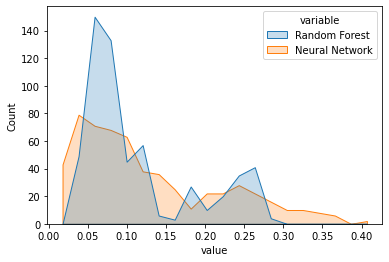

In [254]:
nr_runs = len(model_menu_chance_v2_nn)

runs = list(range(0, nr_runs))

res = {'run': runs, 'Random Forest': model_menu_chance_v2, 'Neural Network': model_menu_chance_v2_nn}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['run'], value_vars=['Random Forest','Neural Network'])


sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

## 5) Predict choice based on menus + Questionnaire

#### 5a) Data processing: Add questionnaire
For now, I add three features:
* Vegetarion or not
* Currently hungry
* Trying to lose weight

In [56]:
questionnaire.columns

Index(['person', 'age', 'gender', 'dietary_requirements',
       'restaurants_frequency', 'fastfood_frequency', 'salt_content',
       'calories', 'satured_fat', 'price', 'taste', 'quantity',
       'checks_ingredients', 'currently_hungry', 'trying_to_lose_weigth'],
      dtype='object')

In [57]:
questionnaire['person'] = questionnaire['person'].astype(str)
questionnaire['Vega'] = questionnaire['dietary_requirements'].apply(lambda x: 1 if ('veg' in x) | ('Veg' in x) else 0) 
data0 = pd.merge(data0,questionnaire[['person','Vega','trying_to_lose_weigth','currently_hungry']],on='person',how='left')
data0['trying_to_lose_weigth'] = data0['trying_to_lose_weigth'].apply(lambda x: 1 if x == 'yes' else 0)
data0['currently_hungry'] = data0['currently_hungry'].apply(lambda x: 1 if x == 'yes' else 0)
data0.columns

Index(['Trial', 'Su', 'person', 'image', 'selection', 'selection_cat',
       'target', 'Price_cat_dish01', 'Price_cat_dish02', 'Price_cat_dish03',
       'Price_cat_dish04', 'Price_cat_dish05', 'Price_cat_dish06',
       'Price_cat_dish07', 'Price_cat_dish08', 'Price_cat_dish09',
       'Price_cat_dish10', 'Price_cat_dish11', 'Price_cat_dish12',
       'Price_cat_dish13', 'Price_cat_dish14', 'Price_cat_dish15',
       'Price_cat_dish16', 'Price_cat_dish17', 'Price_cat_dish18',
       'Price_cat_dish19', 'Price_cat_dish20', 'Price_cat_dish21',
       'Price_cat_dish22', 'Price_cat_dish23', 'Price_cat_dish24',
       'Price_cat_dish25', 'Price_cat_dish26', 'Calories_cat_dish01',
       'Calories_cat_dish02', 'Calories_cat_dish03', 'Calories_cat_dish04',
       'Calories_cat_dish05', 'Calories_cat_dish06', 'Calories_cat_dish07',
       'Calories_cat_dish08', 'Calories_cat_dish09', 'Calories_cat_dish10',
       'Calories_cat_dish11', 'Calories_cat_dish12', 'Calories_cat_dish13',
       'C

In [58]:
def get_X_menu_Q_TargetEncoding():
    price_features = ['Price_cat_dish01','Price_cat_dish02','Price_cat_dish03',
           'Price_cat_dish04', 'Price_cat_dish05', 'Price_cat_dish06',
           'Price_cat_dish07', 'Price_cat_dish08', 'Price_cat_dish09',
           'Price_cat_dish10', 'Price_cat_dish11', 'Price_cat_dish12',
           'Price_cat_dish13', 'Price_cat_dish14', 'Price_cat_dish15',
           'Price_cat_dish16', 'Price_cat_dish17', 'Price_cat_dish18',
           'Price_cat_dish19', 'Price_cat_dish20', 'Price_cat_dish21',
           'Price_cat_dish22', 'Price_cat_dish23', 'Price_cat_dish24',
           'Price_cat_dish25', 'Price_cat_dish26']
    X_temp1 = data0[price_features]
    calorie_features = ['Calories_cat_dish01',
           'Calories_cat_dish02', 'Calories_cat_dish03', 'Calories_cat_dish04',
           'Calories_cat_dish05', 'Calories_cat_dish06', 'Calories_cat_dish07',
           'Calories_cat_dish08', 'Calories_cat_dish09', 'Calories_cat_dish10',
           'Calories_cat_dish11', 'Calories_cat_dish12', 'Calories_cat_dish13',
           'Calories_cat_dish14', 'Calories_cat_dish15', 'Calories_cat_dish16',
           'Calories_cat_dish17', 'Calories_cat_dish18', 'Calories_cat_dish19',
           'Calories_cat_dish20', 'Calories_cat_dish21', 'Calories_cat_dish22',
           'Calories_cat_dish23', 'Calories_cat_dish24', 'Calories_cat_dish25',
           'Calories_cat_dish26']
    X_temp2 = data0[calorie_features]
    position_features = ['Position_dish01', 'Position_dish02',
           'Position_dish03', 'Position_dish04', 'Position_dish05',
           'Position_dish06', 'Position_dish07', 'Position_dish08',
           'Position_dish09', 'Position_dish10', 'Position_dish11',
           'Position_dish12', 'Position_dish13', 'Position_dish14',
           'Position_dish15', 'Position_dish16', 'Position_dish17',
           'Position_dish18', 'Position_dish19', 'Position_dish20',
           'Position_dish21', 'Position_dish22', 'Position_dish23',
           'Position_dish24', 'Position_dish25', 'Position_dish26']
    X_temp3 = data0[position_features]
    quest_features = ['Vega','trying_to_lose_weigth','currently_hungry']
    X_temp4 = data0[quest_features]
    X_TE = pd.concat([X_temp1,X_temp2,X_temp3,X_temp4],axis='columns')
    return X_TE

X_TE = get_X_menu_Q_TargetEncoding()
X_TE

,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,Price_cat_dish04,Price_cat_dish05,Price_cat_dish06,Price_cat_dish07,Price_cat_dish08,Price_cat_dish09,Price_cat_dish10,...,Position_dish20,Position_dish21,Position_dish22,Position_dish23,Position_dish24,Position_dish25,Position_dish26,Vega,trying_to_lose_weigth,currently_hungry
0,Most expensive,Second most expensive,Most expensive,Most expensive,Most expensive,Most expensive,No_meal,No_meal,No_meal,No_meal,...,14,14,14,14,14,14,14,0,0,0
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No_meal,No_meal,...,14,14,14,14,14,14,14,0,0,0
2,Middle,Most expensive,Middle,Middle,Second cheapest,Cheapest,Middle,Second cheapest,Middle,Middle,...,14,14,14,14,14,14,14,0,0,0
3,Second most expensive,Middle,Most expensive,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,14,14,14,14,14,14,14,0,0,1
4,Second cheapest,Middle,Second most expensive,Middle,Most expensive,Middle,Most expensive,Middle,Middle,Second most expensive,...,14,14,14,14,14,14,14,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Second cheapest,Middle,Middle,Middle,Most expensive,Middle,Second most expensive,Middle,Second cheapest,Middle,...,14,14,14,14,14,14,14,0,0,0
534,Second most expensive,Second most expensive,Cheapest,Most expensive,Second most expensive,Second most expensive,Second most expensive,Second cheapest,Second most expensive,Second most expensive,...,14,14,14,14,14,14,14,0,0,1
535,Second most expensive,Second most expensive,Second cheapest,Most expensive,Cheapest,Second most expensive,Second cheapest,Middle,Second most expensive,Middle,...,6,14,14,14,14,14,14,0,0,0
536,Second most expensive,Middle,Most expensive,Second most expensive,Second most expensive,Middle,Second cheapest,Cheapest,Second most expensive,Cheapest,...,14,14,14,14,14,14,14,1,1,1


#### 5b) Train ML-models (menu-info + questionnaire)

In [59]:
model_menu_Q_chance_v2 = []
X0 = X_TE.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            RF = RandomForestClassifier(criterion='gini', random_state=rs)
            RF.fit(X_train, y_train)
            y_pred = RF.predict_proba(X_test)
            y_pred2 = transform_y_pred()
            model_menu_Q_chance_v2.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

The random forest performs worse with the questionnaire info:

In [60]:
np.mean(model_menu_Q_chance_v2)

0.1102120880426708

In [61]:
model_menu_Q_chance_v2_nn = []
X0 = X_TE.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            nn = MLPClassifier(random_state=rs,max_iter=1000)
            nn.fit(X_train, y_train)
            y_pred = nn.predict_proba(X_test)
            model_menu_Q_chance_v2_nn.append(np.multiply(y_test,y_pred).max(axis=1).mean())

C:\Users\gdawe2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gdawe2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gdawe2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\gdawe2\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


However, the neural network performs better with the questionnaire info:

In [255]:
np.mean(model_menu_Q_chance_v2_nn)

0.13446599955671495

<AxesSubplot:xlabel='value', ylabel='Count'>

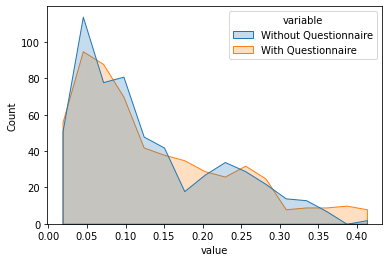

In [256]:
nr_runs = len(model_menu_chance_v2_nn)

runs = list(range(0, nr_runs))

res = {'run': runs, 'Without Questionnaire': model_menu_chance_v2_nn, 'With Questionnaire': model_menu_Q_chance_v2_nn}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['run'], value_vars=['Without Questionnaire','With Questionnaire'])


sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

it is even significant better than the neural network without questionnaire:

In [63]:
results = stats.ttest_rel(model_menu_Q_chance_v2_nn,model_menu_chance_v2_nn,alternative='two-sided')
results

TtestResult(statistic=3.0914888282410526, pvalue=0.0020873300540609585, df=579)

In [64]:
results = stats.ttest_rel(model_menu_Q_chance_v2_nn,model_menu_chance_v2_nn,alternative='greater')
results

TtestResult(statistic=3.0914888282410526, pvalue=0.0010436650270304792, df=579)

## 6) Predict choice based on menus + Questionnaire + Eye tracking

I investigate two eye-tracking characteristics:

* How often did they look at menu_times
* How long (in total) did they look at menu_items

<b> How often</b>

first get the 'how often' features per dish:

In [167]:
def get_X_howOften():
    cols = []
    for c in range(0,25):
        if c<9:
            colname = '0'+str(c+1)
        else:
            colname=str(c+1)
        cols.append('eye_howOften_'+colname)
    # create dataframe without rows
    how_often = pd.DataFrame(columns=cols)

    for t, p in zip(data0['Trial'],data0['person']):   
        # find data in loop
        how_often_temp = [0] * len(cols)   
        data_temp = data[(data['Trial']==t) & (data['person']==p) & (data['Category']=='Menu_Item')].reset_index(drop=True)
        # find how often is looked at ech item
        data_temp2 = data_temp.groupby('Name').size().reset_index()
        info_menus_temp = info_menus[info_menus['menu']==data_temp['image'][0][:-4]]
        
        # convert dish to target number
        indx0 = []
        for i in range(0,len(data_temp2)):
            if data_temp2['Name'][i] in list(info_menus_temp['items']):
                indx = info_menus_temp.index[info_menus_temp['items']==data_temp2['Name'][i]].tolist()[0]
                indx2 = info_menus_temp['index'][indx]
                indx0.append(indx2)
            else:
                indx0.append(-1)
        data_temp2['index'] = indx0
        
        # assign number of times watched to list
        for i in range(0,len(data_temp2)):
            if not data_temp2['index'][i] == -1:
                if not data_temp2['index'][i] == 26:
                    how_often_temp[data_temp2['index'][i]-1] = data_temp2[0][i]
        
        # add list as row to dataframe
        how_often.loc[len(how_often)] = how_often_temp
    return how_often

how_often = get_X_howOften()
how_often

,eye_howOften_01,eye_howOften_02,eye_howOften_03,eye_howOften_04,eye_howOften_05,eye_howOften_06,eye_howOften_07,eye_howOften_08,eye_howOften_09,eye_howOften_10,...,eye_howOften_16,eye_howOften_17,eye_howOften_18,eye_howOften_19,eye_howOften_20,eye_howOften_21,eye_howOften_22,eye_howOften_23,eye_howOften_24,eye_howOften_25
0,9,4,10,7,7,9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,5,1,8,1,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,41,9,2,0,2,0,0,4,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,17,0,1,5,1,...,2,1,0,0,0,0,0,0,0,0
4,2,4,1,3,2,3,1,2,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2,1,1,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
534,2,5,18,2,2,5,4,2,11,13,...,0,0,0,0,0,0,0,0,0,0
535,0,3,0,0,0,0,0,1,4,0,...,2,0,0,0,0,0,0,0,0,0
536,3,2,4,4,2,0,0,5,3,0,...,0,0,0,0,0,0,0,0,0,0


merge old X with how_often info:

In [170]:
X_TE2 = pd.concat([X_TE,how_often],axis='columns')
X_TE2

,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,Price_cat_dish04,Price_cat_dish05,Price_cat_dish06,Price_cat_dish07,Price_cat_dish08,Price_cat_dish09,Price_cat_dish10,...,eye_howOften_16,eye_howOften_17,eye_howOften_18,eye_howOften_19,eye_howOften_20,eye_howOften_21,eye_howOften_22,eye_howOften_23,eye_howOften_24,eye_howOften_25
0,Most expensive,Second most expensive,Most expensive,Most expensive,Most expensive,Most expensive,No_meal,No_meal,No_meal,No_meal,...,0,0,0,0,0,0,0,0,0,0
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No_meal,No_meal,...,0,0,0,0,0,0,0,0,0,0
2,Middle,Most expensive,Middle,Middle,Second cheapest,Cheapest,Middle,Second cheapest,Middle,Middle,...,0,0,0,0,0,0,0,0,0,0
3,Second most expensive,Middle,Most expensive,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,2,1,0,0,0,0,0,0,0,0
4,Second cheapest,Middle,Second most expensive,Middle,Most expensive,Middle,Most expensive,Middle,Middle,Second most expensive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Second cheapest,Middle,Middle,Middle,Most expensive,Middle,Second most expensive,Middle,Second cheapest,Middle,...,0,0,0,0,0,0,0,0,0,0
534,Second most expensive,Second most expensive,Cheapest,Most expensive,Second most expensive,Second most expensive,Second most expensive,Second cheapest,Second most expensive,Second most expensive,...,0,0,0,0,0,0,0,0,0,0
535,Second most expensive,Second most expensive,Second cheapest,Most expensive,Cheapest,Second most expensive,Second cheapest,Middle,Second most expensive,Middle,...,2,0,0,0,0,0,0,0,0,0
536,Second most expensive,Middle,Most expensive,Second most expensive,Second most expensive,Middle,Second cheapest,Cheapest,Second most expensive,Cheapest,...,0,0,0,0,0,0,0,0,0,0


Run the random forests:

In [171]:
model_menu_Q_eyeHowOften_chance_v2 = []
X0 = X_TE2.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE2[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE2[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            RF = RandomForestClassifier(criterion='gini', random_state=rs)
            RF.fit(X_train, y_train)
            y_pred = RF.predict_proba(X_test)
            y_pred2 = transform_y_pred()
            model_menu_Q_eyeHowOften_chance_v2.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

The result is significant improved:

In [172]:
np.mean(model_menu_Q_eyeHowOften_chance_v2)

0.15495468043157834

In [173]:
results = stats.ttest_rel(model_menu_Q_eyeHowOften_chance_v2,model_menu_Q_chance_v2,alternative='two-sided')
results

TtestResult(statistic=25.828506480551503, pvalue=1.9370536727778714e-98, df=579)

In [257]:
results = stats.ttest_rel(model_menu_Q_eyeHowOften_chance_v2,model_menu_Q_chance_v2,alternative='greater')
results

TtestResult(statistic=25.828506480551503, pvalue=9.685268363889357e-99, df=579)

<AxesSubplot:xlabel='value', ylabel='Count'>

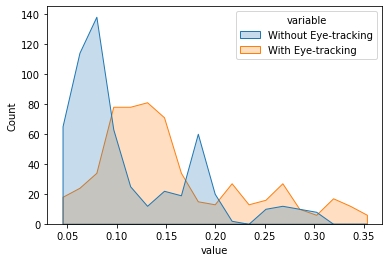

In [259]:
nr_runs = len(model_menu_chance_v2_nn)

runs = list(range(0, nr_runs))

res = {'run': runs, 'Without Eye-tracking': model_menu_Q_chance_v2, 'With Eye-tracking': model_menu_Q_eyeHowOften_chance_v2}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['run'], value_vars=['Without Eye-tracking','With Eye-tracking'])


sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

Neural network (max_iter needed to be increased to 2000, which strongly increases calculation times)

In [248]:
model_menu_Q_eyeHowOften_chance_v2_nn = []
X0 = X_TE2.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE2[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE2[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            #print('nn often: '+m+' - '+str(rs))
            nn = MLPClassifier(random_state=rs,max_iter=2000)
            nn.fit(X_train, y_train)
            y_pred = nn.predict_proba(X_test)
            model_menu_Q_eyeHowOften_chance_v2_nn.append(np.multiply(y_test,y_pred).max(axis=1).mean())

Result is better than for random forests:

In [249]:
np.mean(model_menu_Q_eyeHowOften_chance_v2_nn)

0.19586508553479312

In [229]:
results = stats.ttest_rel(model_menu_Q_eyeHowOften_chance_v2_nn,model_menu_Q_chance_v2_nn,alternative='two-sided')
results

TtestResult(statistic=16.146372743720004, pvalue=1.0800839978567271e-48, df=579)

In [230]:
results = stats.ttest_rel(model_menu_Q_eyeHowOften_chance_v2_nn,model_menu_Q_chance_v2_nn,alternative='greater')
results

<AxesSubplot:xlabel='value', ylabel='Count'>

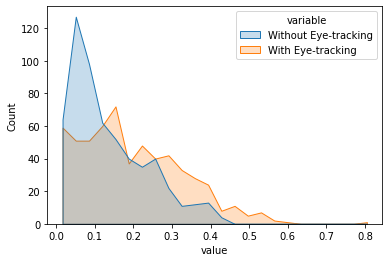

In [260]:
nr_runs = len(model_menu_chance_v2_nn)

runs = list(range(0, nr_runs))

res = {'run': runs, 'Without Eye-tracking': model_menu_Q_chance_v2_nn, 'With Eye-tracking': model_menu_Q_eyeHowOften_chance_v2_nn}
df = pd.DataFrame(data=res)
df_long = pd.melt(df, id_vars=['run'], value_vars=['Without Eye-tracking','With Eye-tracking'])


sns.histplot(data=df_long, x="value", hue = "variable", element="poly")

<b>how long</b>

features:

In [231]:
def get_X_howLong():
    cols = []
    for c in range(0,25):
        if c<9:
            colname = '0'+str(c+1)
        else:
            colname=str(c+1)
        cols.append('eye_howLong_'+colname)
    # create dataframe without rows
    how_long = pd.DataFrame(columns=cols)

    for t, p in zip(data0['Trial'],data0['person']):   
        # find data in loop
        how_long_temp = [0] * len(cols)   
        data_temp = data[(data['Trial']==t) & (data['person']==p) & (data['Category']=='Menu_Item')].reset_index(drop=True)
        # find how often is looked at ech item
        data_temp2 = data_temp.groupby('Name')[['Name','Duration']].sum().reset_index()
        info_menus_temp = info_menus[info_menus['menu']==data_temp['image'][0][:-4]]
        
        # convert dish to target number
        indx0 = []
        for i in range(0,len(data_temp2)):
            if data_temp2['Name'][i] in list(info_menus_temp['items']):
                indx = info_menus_temp.index[info_menus_temp['items']==data_temp2['Name'][i]].tolist()[0]
                indx2 = info_menus_temp['index'][indx]
                indx0.append(indx2)
            else:
                indx0.append(-1)
        data_temp2['index'] = indx0
        
        # assign 'how long' to list
        for i in range(0,len(data_temp2)):
            if not data_temp2['index'][i] == -1:
                if not data_temp2['index'][i] == 26:
                    how_long_temp[data_temp2['index'][i]-1] = data_temp2['Duration'][i]
        
        # add list as row to dataframe
        #how_long_temp = [x/np.mean(how_long_temp) for x in how_long_temp]
        how_long.loc[len(how_long)] = how_long_temp
    return how_long

how_long = get_X_howLong()
how_long

,eye_howLong_01,eye_howLong_02,eye_howLong_03,eye_howLong_04,eye_howLong_05,eye_howLong_06,eye_howLong_07,eye_howLong_08,eye_howLong_09,eye_howLong_10,...,eye_howLong_16,eye_howLong_17,eye_howLong_18,eye_howLong_19,eye_howLong_20,eye_howLong_21,eye_howLong_22,eye_howLong_23,eye_howLong_24,eye_howLong_25
0,1578,544,2760,1376,1626,1813,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,408,1204,275,3824,372,385,1032,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,7942,1648,386,0,300,0,0,786,198,...,0,0,0,0,0,0,0,0,0,0
3,311,0,0,0,0,6295,0,349,1779,469,...,548,268,0,0,0,0,0,0,0,0
4,730,948,234,705,471,622,297,550,426,146,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,361,334,231,0,198,0,0,0,580,0,...,0,0,0,0,0,0,0,0,0,0
534,385,626,3287,303,192,1033,828,334,1639,2529,...,0,0,0,0,0,0,0,0,0,0
535,0,637,0,0,0,0,0,321,664,0,...,304,0,0,0,0,0,0,0,0,0
536,601,433,792,942,313,0,0,1114,441,0,...,0,0,0,0,0,0,0,0,0,0


In [232]:
X_TE3 = pd.concat([X_TE,how_long],axis='columns')
X_TE3

,Price_cat_dish01,Price_cat_dish02,Price_cat_dish03,Price_cat_dish04,Price_cat_dish05,Price_cat_dish06,Price_cat_dish07,Price_cat_dish08,Price_cat_dish09,Price_cat_dish10,...,eye_howLong_16,eye_howLong_17,eye_howLong_18,eye_howLong_19,eye_howLong_20,eye_howLong_21,eye_howLong_22,eye_howLong_23,eye_howLong_24,eye_howLong_25
0,Most expensive,Second most expensive,Most expensive,Most expensive,Most expensive,Most expensive,No_meal,No_meal,No_meal,No_meal,...,0,0,0,0,0,0,0,0,0,0
1,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,No_meal,No_meal,...,0,0,0,0,0,0,0,0,0,0
2,Middle,Most expensive,Middle,Middle,Second cheapest,Cheapest,Middle,Second cheapest,Middle,Middle,...,0,0,0,0,0,0,0,0,0,0
3,Second most expensive,Middle,Most expensive,Middle,Middle,Middle,Middle,Middle,Middle,Middle,...,548,268,0,0,0,0,0,0,0,0
4,Second cheapest,Middle,Second most expensive,Middle,Most expensive,Middle,Most expensive,Middle,Middle,Second most expensive,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,Second cheapest,Middle,Middle,Middle,Most expensive,Middle,Second most expensive,Middle,Second cheapest,Middle,...,0,0,0,0,0,0,0,0,0,0
534,Second most expensive,Second most expensive,Cheapest,Most expensive,Second most expensive,Second most expensive,Second most expensive,Second cheapest,Second most expensive,Second most expensive,...,0,0,0,0,0,0,0,0,0,0
535,Second most expensive,Second most expensive,Second cheapest,Most expensive,Cheapest,Second most expensive,Second cheapest,Middle,Second most expensive,Middle,...,304,0,0,0,0,0,0,0,0,0
536,Second most expensive,Middle,Most expensive,Second most expensive,Second most expensive,Middle,Second cheapest,Cheapest,Second most expensive,Cheapest,...,0,0,0,0,0,0,0,0,0,0


Run the random forests:

In [233]:
model_menu_Q_eyeHowLong_chance_v2 = []
X0 = X_TE3.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE3[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE3[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            RF = RandomForestClassifier(criterion='gini', random_state=rs)
            RF.fit(X_train, y_train)
            y_pred = RF.predict_proba(X_test)
            y_pred2 = transform_y_pred()
            model_menu_Q_eyeHowLong_chance_v2.append(np.multiply(y_test,y_pred2).max(axis=1).mean())

no good result at all:

In [234]:
np.mean(model_menu_Q_eyeHowLong_chance_v2)

0.10993324355975108

In [235]:
results = stats.ttest_rel(model_menu_Q_eyeHowLong_chance_v2,model_menu_Q_chance_v2,alternative='two-sided')
results

TtestResult(statistic=-0.22283649013748696, pvalue=0.8237413546710693, df=579)

In [239]:
results = stats.ttest_rel(model_menu_Q_eyeHowLong_chance_v2,model_menu_Q_chance_v2,alternative='greater')
results

TtestResult(statistic=-0.22283649013748696, pvalue=0.5881293226644653, df=579)

neural network:

In [241]:
model_menu_Q_eyeHowLong_chance_v2_nn = []
X0 = X_TE3.copy()
X0['menu'] = data0['image']
for m in X0['menu'].unique():
    if not m == 'menu4.csv':
        X_train = X_TE3[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        X_test = X_TE3[X0['menu'] == m]
        y_train = y[(X0['menu'] != m) & (X0['menu'] != 'menu4.csv')]
        y_test = y[X0['menu'] == m]
        X_train,X_test = transform_X(X_train,X_test,y_train,y_test)
        for rs in range(0,20):
            #print('nn long: '+m+' - '+str(rs))
            nn = MLPClassifier(random_state=rs,max_iter=2500)
            nn.fit(X_train, y_train)
            y_pred = nn.predict_proba(X_test)
            model_menu_Q_eyeHowLong_chance_v2_nn.append(np.multiply(y_test,y_pred).max(axis=1).mean())

No good result at all:

In [242]:
np.mean(model_menu_Q_eyeHowLong_chance_v2_nn)

0.08777090389988777

In [243]:
results = stats.ttest_rel(model_menu_Q_eyeHowLong_chance_v2_nn,model_menu_Q_chance_v2_nn,alternative='two-sided')
results

TtestResult(statistic=-10.747009589960845, pvalue=1.0912950068988456e-24, df=579)

In [244]:
results = stats.ttest_rel(model_menu_Q_eyeHowLong_chance_v2_nn,model_menu_Q_chance_v2_nn,alternative='greater')
results

TtestResult(statistic=-10.747009589960845, pvalue=1.0, df=579)